In [1]:
from utils import DATA

edf_path = 'C:\EEGAnotator\Data\Patients\F10\PictureNaming\eeg\\f10.edf'
xdf_path = 'C:\EEGAnotator\Data\Patients\F10\PictureNaming\xdf\f10.xdf'


In [16]:
from test1 import get_sheet_names
filepath = 'Data_60mints - new.xlsx'
sheets = get_sheet_names(filepath)
sheets

['Frequency', 'TV', 'TVBW', 'MV']

In [18]:
freq = pd.read_excel(filepath, sheet_name=sheets[0])
freq = freq.dropna()
freq.columns = freq.iloc[0]
freq = freq[1:]
freq

,Time (mints),Phox_9284_WT,Phox_9285_WT,Phox_9301_WT,Phox_9302_WT,Phox_9306_WT,Phox_WT_708,Phox_WT_710,Phox_WT_712,#1885_WT,...,AVG_Controls,Phox_9281_KO,Phox_9283_KO,Phox_9305_KO,Phox_KO_705,Phox_KO_707,#1795_KO,#1887_KO,#1999_KO,AVG_Kos
1,1,246.166667,287.333333,245.875,264,286.451613,311,210.710526,286.461538,247.4375,...,256.932417,293.625,299.16,188.4,339.166667,220.75,238.785714,167.905797,213.111111,245.113036
2,2,226.955556,297.589744,263.083333,328.722222,300.282051,297.589744,230.596491,290.1,252.552632,...,266.38402,270.64,306.545455,258.6,292.933333,238.321429,242.238095,169.578431,200.695238,247.443998
3,3,206.886792,292.869565,282.117647,304.37037,290,307.5,221.321429,243.214286,237.681818,...,257.637086,290.0625,300,246.923077,323.35,289.466667,230.806452,169.058824,206.421053,257.011071
4,4,210.761905,298.826087,280.96875,291.852941,277.795455,291.25,220.383333,262.352941,243.170732,...,256.739864,301.325581,310.888889,291.083333,295,272.333333,230.276316,174.740741,209.857143,260.688167
5,5,220.05,299.727273,296.071429,328.837838,241.065217,301.666667,235.266667,255.636364,207.606299,...,257.857154,252.2,314,317.785714,281.304348,275.314815,222.860759,145.011494,217.306122,253.222907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,233.880952,223.5,246.616667,332.958333,298.896552,284.236842,175.448276,223.176471,229.081081,...,249.734846,293.727273,275.071429,224.293103,214.6,222.883333,155.251534,160.903846,251.24,224.746315
58,58,282.2,203.016667,249.016667,323.956522,278.7,233.511628,211.766667,301,212.513966,...,250.513805,248.588235,281.928571,226.3,205.05,204.416667,179.526316,153.785,248.607143,218.525242
59,59,244.162162,197.116667,247.716667,324.295455,237,244.071429,224.233333,283.405405,198.921053,...,241.205898,249.255814,321.666667,213.733333,270.466667,209.133333,232.858586,161.029851,258.428571,239.571603
60,60,274.9,216.633333,235.2,331.209302,231,231.365385,228.87931,269.428571,217.418079,...,243.868104,238.380952,244.428571,232.647059,268.966667,228.366667,226.947368,180.693396,237.153846,232.198066


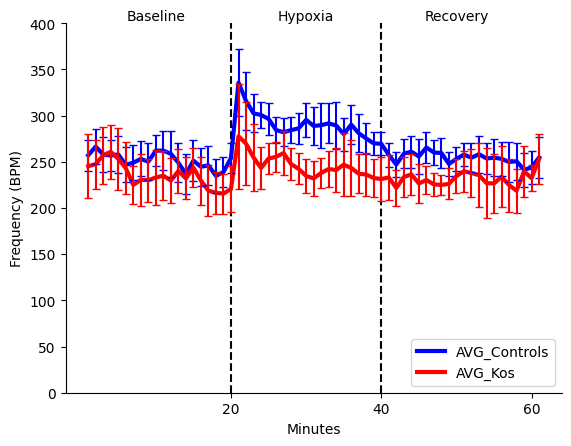

In [88]:
import matplotlib.pyplot as plt
freq = pd.read_excel(filepath, sheet_name=sheets[0])
freq = freq.dropna()
freq.columns = freq.iloc[0]
freq = freq[1:]
freq


sem_controls = freq.iloc[:, 1:freq.columns.get_loc('AVG_Controls')].sem(axis=1).values
sem_controls_below = freq['AVG_Controls'].values - 1.96 * sem_controls
sem_controls_above = freq['AVG_Controls'].values + 1.96 * sem_controls
sem_kos = freq.iloc[:, freq.columns.get_loc('AVG_Controls') + 1:freq.columns.get_loc('AVG_Kos')].sem(axis=1).values
sem_kos_below = freq['AVG_Kos'] - 1.96 * sem_kos
sem_kos_ablove = freq['AVG_Kos'] + 1.96 * sem_kos



plt.plot(freq['AVG_Controls'], color='blue', label='AVG_Controls', linewidth=3 )
plt.plot(freq['AVG_Kos'], color='red', label='AVG_Kos',  linewidth=3)

plt.ylim(0, 400)
plt.xticks([20, 40, 60], ['20', '40', '60'])

plt.axvline(x=20, color='black', linestyle='--')
plt.axvline(x=40, color='black', linestyle='--')

plt.text(10, plt.ylim()[1], 'Baseline', ha='center', va='bottom')
plt.text(30, plt.ylim()[1], 'Hypoxia', ha='center', va='bottom')
plt.text(50, plt.ylim()[1], 'Recovery', ha='center', va='bottom')

#plt.fill_between(freq.index, sem_controls_above, sen, color='blue')
#plt.fill_between(freq.index, sem_controls_above.astype('float'), sem_controls_below.astype('float'), color='blue', alpha=0.2)
#plt.fill_between(freq.index, sem_kos_ablove.astype('float'), sem_kos_below.astype('float'), color='red', alpha=0.2)

plt.errorbar(freq.index, freq['AVG_Controls'], yerr=1.645*sem_controls, fmt='none', color='blue', capsize=3)
plt.errorbar(freq.index, freq['AVG_Kos'], yerr=1.645*sem_kos, fmt='none', color='red', capsize=3)


#plt.plot(freq.index, sem_controls_above, color='blue', linestyle='--', linewidth=0.5, zorder=3)
#plt.plot(freq.index, sem_controls_below, color='blue', linestyle='--', linewidth=0.5, zorder=3)
#plt.plot(freq.index, sem_kos_ablove, color='red', linestyle='--', linewidth=0.5, zorder=3)
#plt.plot(freq.index, sem_kos_below, color='red', linestyle='--', linewidth=0.5, zorder=3)

plt.xlabel('Minutes')
plt.ylabel('Frequency (BPM)')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='lower right')

plt.show()


In [91]:
freq.columns

Index(['Time (mints)', 'Phox_9284_WT', 'Phox_9285_WT', 'Phox_9301_WT',
       'Phox_9302_WT', 'Phox_9306_WT', 'Phox_WT_708', 'Phox_WT_710',
       'Phox_WT_712', '#1885_WT', '#1886_WT', '#1890_WT', 'AVG_Controls',
       'Phox_9281_KO', 'Phox_9283_KO', 'Phox_9305_KO', 'Phox_KO_705',
       'Phox_KO_707', '#1795_KO', '#1887_KO', '#1999_KO', 'AVG_KOS'],
      dtype='object', name=0)

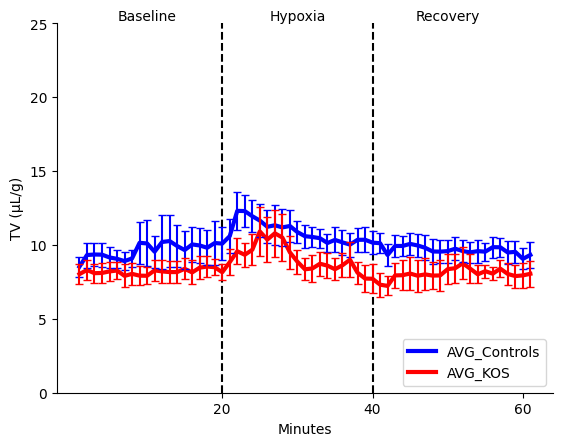

In [103]:
import matplotlib.pyplot as plt
freq = pd.read_excel(filepath, sheet_name=sheets[2])
freq = freq.dropna()
freq.columns = freq.iloc[0]
freq = freq[1:]
freq

sem_controls = freq.iloc[:, 1:freq.columns.get_loc('AVG_Controls')].sem(axis=1).values
sem_controls_below = freq['AVG_Controls'].values - 1.96 * sem_controls
sem_controls_above = freq['AVG_Controls'].values + 1.96 * sem_controls
sem_kos = freq.iloc[:, freq.columns.get_loc('AVG_Controls') + 1:freq.columns.get_loc('AVG_KOS')].sem(axis=1).values
sem_kos_below = freq['AVG_KOS'] - 1.96 * sem_kos
sem_kos_ablove = freq['AVG_KOS'] + 1.96 * sem_kos



plt.plot(freq['AVG_Controls'], color='blue', label='AVG_Controls', linewidth=3 )
plt.plot(freq['AVG_KOS'], color='red', label='AVG_KOS',  linewidth=3)

plt.ylim(0, 25)
plt.xticks([20, 40, 60], ['20', '40', '60'])

plt.axvline(x=20, color='black', linestyle='--')
plt.axvline(x=40, color='black', linestyle='--')

plt.text(10, plt.ylim()[1], 'Baseline', ha='center', va='bottom')
plt.text(30, plt.ylim()[1], 'Hypoxia', ha='center', va='bottom')
plt.text(50, plt.ylim()[1], 'Recovery', ha='center', va='bottom')

#plt.fill_between(freq.index, sem_controls_above, sen, color='blue')
#plt.fill_between(freq.index, sem_controls_above.astype('float'), sem_controls_below.astype('float'), color='blue', alpha=0.2)
#plt.fill_between(freq.index, sem_kos_ablove.astype('float'), sem_kos_below.astype('float'), color='red', alpha=0.2)

plt.errorbar(freq.index, freq['AVG_Controls'], yerr=sem_controls, fmt='none', color='blue', capsize=3)
plt.errorbar(freq.index, freq['AVG_KOS'], yerr=sem_kos, fmt='none', color='red', capsize=3)


#plt.plot(freq.index, sem_controls_above, color='blue', linestyle='--', linewidth=0.5, zorder=3)
#plt.plot(freq.index, sem_controls_below, color='blue', linestyle='--', linewidth=0.5, zorder=3)
#plt.plot(freq.index, sem_kos_ablove, color='red', linestyle='--', linewidth=0.5, zorder=3)
#plt.plot(freq.index, sem_kos_below, color='red', linestyle='--', linewidth=0.5, zorder=3)

plt.xlabel('Minutes')
plt.ylabel('TV (μL/g)')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='lower right')

plt.show()




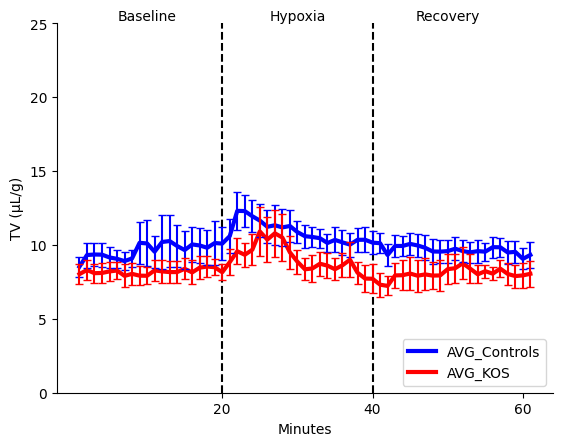

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming freq, sem_controls, sem_kos are defined as before

plt.plot(freq['AVG_Controls'], color='blue', label='AVG_Controls', linewidth=3)
plt.plot(freq['AVG_KOS'], color='red', label='AVG_KOS', linewidth=3)

plt.ylim(0, 25)
plt.xticks([20, 40, 60], ['20', '40', '60'])

plt.axvline(x=20, color='black', linestyle='--')
plt.axvline(x=40, color='black', linestyle='--')

plt.text(10, plt.ylim()[1], 'Baseline', ha='center', va='bottom')
plt.text(30, plt.ylim()[1], 'Hypoxia', ha='center', va='bottom')
plt.text(50, plt.ylim()[1], 'Recovery', ha='center', va='bottom')

# Plotting SEM error bars for AVG_Controls
plt.errorbar(freq.index, freq['AVG_Controls'], yerr=sem_controls, fmt='none', color='blue', capsize=3)

# Plotting SEM error bars for AVG_KOS
plt.errorbar(freq.index, freq['AVG_KOS'], yerr=sem_kos, fmt='none', color='red', capsize=3)

plt.xlabel('Minutes')
plt.ylabel('TV (μL/g)')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='lower right')

plt.show()


In [102]:
sem_kos

array([0.6781154294783306, 0.6921596187907252, 0.6434244473840739,
       0.6462457411493768, 0.6387043695964587, 0.6046563893859521,
       0.784813812529916, 0.7258499367637532, 0.6517354470075517,
       0.55946758504857, 0.6967365367877142, 0.7696721364834891,
       0.7716123129752096, 0.7577687465963163, 0.7196494194544234,
       0.8113446899641826, 0.7824931523584792, 0.7108372991759754,
       0.5393827221294538, 0.5566135719349503, 0.875415574386979,
       0.8945888843275018, 0.7946142393946769, 1.0566428697759804,
       1.6405899527104395, 1.52614873449525, 1.5864547810058218,
       1.5685973314292507, 1.1219979095029318, 0.8202899925604397,
       0.7497668746163371, 0.9308116516030901, 0.7997254369205414,
       0.8426665058773755, 0.7541341890049967, 0.8172657835302741,
       1.1692992578743262, 0.7476674928059068, 0.9079330564978588,
       0.9643091044900981, 0.8131520268858543, 0.6400250365148077,
       0.849792201150295, 1.033338170892306, 1.1336039253136054,
   

In [1]:
from utils import DATA

edf_path = 'C:\EEGAnotator\Data\Patients\F10\PictureNaming\eeg\\f10.edf'
xdf_path = 'C:\EEGAnotator\Data\Patients\F10\PictureNaming\xdf\f10.xdf'

from src.eeg import EEG

In [2]:
eeg_data = EEG(edf_path)

*********************************************************************************
***************************Loading .edf file***************************
C:\EEGAnotator\Data\Patients\F10\PictureNaming\eeg\f10.edf
Extracting EDF parameters from C:\EEGAnotator\Data\Patients\F10\PictureNaming\eeg\f10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
*******************************Completed*******************************
Checking for Interruptions
No interruptions detected.


In [3]:
eeg_data.print_info()

File Path: C:\EEGAnotator\Data\Patients\F10\PictureNaming\eeg\f10.edf
Number of Channels: 148
Bad Channels: []
Channel Names: ['HT1', 'HT2', 'HT3', 'HT4', 'HT5', 'HT6', 'HT7', 'HT8', 'HT9', 'HT10', 'PI1', 'PI2', 'PI3', 'PI4', 'PI5', 'PI6', 'PI7', 'PI8', 'C19', 'IA1', 'IA2', 'IA3', 'IA4', 'IA5', 'IA6', 'IA7', 'IA8', 'IA9', 'IA10', 'C30', 'HC1', 'HC2', 'HC3', 'HC4', 'HC5', 'HC6', 'HC7', 'HC8', 'HC9', 'HC10', 'C41', 'NA1', 'NA2', 'NA3', 'NA4', 'NA5', 'NA6', 'NA7', 'NA8', 'NA9', 'NA10', 'NA11', 'NA12', 'C54', 'IP1', 'IP2', 'IP3', 'IP4', 'IP5', 'IP6', 'IP7', 'IP8', 'IP9', 'IP10', 'Ch65', 'Ch66', 'Ch67', 'Ch68', 'Ch69', 'Ch70', 'Ch71', 'Ch72', 'Ch73', 'Ch74', 'C75', 'Ch76', 'Ch77', 'Ch78', 'Ch79', 'Ch80', 'Ch81', 'Ch82', 'Ch83', 'Ch84', 'Ch85', 'Ch86', 'Ch87', 'C88', 'Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'T1', 'T2', 'Fz', 'Cz', 'Pz', 'PG1', 'PG2', 'C112', 'ECG+', 'ECG-', 'Delt I+', 'Delt I-', 'Delt D+', 'Delt D-', 'C119', 'C120', 'C

In [4]:
eeg_data.events

[('START_READ_WORD', 0, 4636),
 ('START_BLOCK_SAYING', 4636, 4662),
 ('START_READ_WORD', 4662, 5643),
 ('EXPERIMENT_END', 5643, 5669),
 ('START_READ_WORD', 5669, 6412),
 ('EXPERIMENT_REST', 6412, 6437),
 ('START_READ_WORD', 6437, 7207),
 ('EXPERIMENT_RESTART', 7207, 7233),
 ('START_READ_WORD', 7233, 7976),
 ('START_BLOCK_THINKING', 7976, 8002),
 ('START_READ_WORD', 8002, 8793),
 ('EXPERIMENT_END', 8793, 8819),
 ('START_READ_WORD', 8819, 9562),
 ('EXPERIMENT_REST', 9562, 9588),
 ('START_READ_WORD', 9588, 10403),
 ('EXPERIMENT_RESTART', 10403, 10428),
 ('START_READ_WORD', 10428, 11173),
 ('START_BLOCK_THINKING', 11173, 11198),
 ('START_READ_WORD', 11198, 12189),
 ('EXPERIMENT_END', 12189, 12215),
 ('START_READ_WORD', 12215, 12958),
 ('EXPERIMENT_REST', 12958, 12984),
 ('START_READ_WORD', 12984, 13744),
 ('EXPERIMENT_RESTART', 13744, 13770),
 ('START_READ_WORD', 13770, 14514),
 ('START_BLOCK_THINKING', 14514, 14539),
 ('START_READ_WORD', 14539, 15464),
 ('EXPERIMENT_END', 15464, 15489),
 